In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Old Data

In [2]:
sujets = ['AM','BMC','CS']#,'DC','FM','IP','LB','OP','RS','SR','TN','YK']

with open('parametre/Delete/Delete_list_trials_velocity_fct.pkl', 'rb') as fichier :
    delete = pickle.load(fichier, encoding='latin1')
    
with open('parametre/Delete/Delete_list_Bad_trials_velocity.pkl', 'rb') as fichier :
    Bad = pickle.load(fichier, encoding='latin1')

covar_good = {'steady_state':[], 'latency':[], 'tau':[], 'a_anti':[], 'start_anti':[]}
covar_bad  = {'steady_state':[], 'latency':[], 'tau':[], 'a_anti':[], 'start_anti':[]}

for s in sujets :
    with open('parametre/fct_velocity/param_Fit_%s_fct_velocity.pkl'%s, 'rb') as fichier :
        param = pickle.load(fichier, encoding='latin1')
                   
    for b in range(param['N_blocks']) :
        for t in range(param['N_trials']) :
            #print('\n',param['covar'][b][t])

            for p in covar_good.keys() :
                num_p = param['covar'][b][t][0].index(p)
                covar_ = param['covar'][b][t][1][num_p][num_p]
                #print(p, covar_, end=' _ ')
                if t in Bad[s][b] or t in delete[s][b] : covar_bad[p].append(covar_)
                else :                                   covar_good[p].append(covar_)

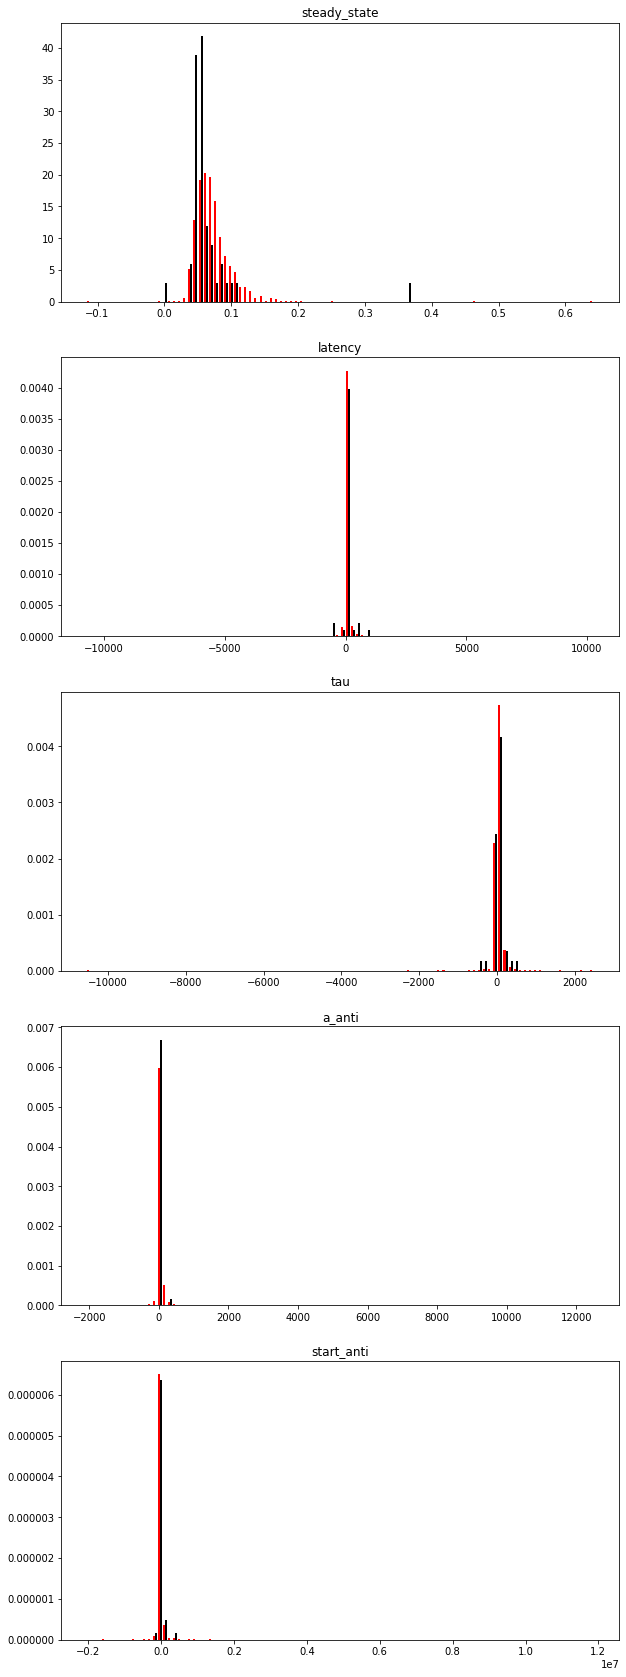

In [3]:
nb_param = len(covar_good.keys())
fig, ax = plt.subplots(nb_param, 1, figsize=(10,10*nb_param/1.681))
for num_p, p in enumerate(covar_good.keys()) :
    ax[num_p].hist([covar_good[p], covar_bad[p]],
                   color=['r', 'k'], density=True, bins=100)#, histtype='step', align='mid')
    
    ax[num_p].set_title(p)
    #ax[num_p].set_ylim(0,1)

# New Data

In [4]:
covar_good = {'steady_state':[], 'latency':[], 'tau':[], 'a_anti':[], 'start_anti':[]}
covar_bad  = {'steady_state':[], 'latency':[], 'tau':[], 'a_anti':[], 'start_anti':[]}

sujet = np.arange(1, 20)
sujet = np.delete(sujet, 8)
sujet = np.delete(sujet, 12)

for s in [1, 2, 3, 4, 5] : #sujet :
    with open('parametre/new_data/fct_velocity/param_Fit_s%sBL50_fct_velocity.pkl'%s, 'rb') as fichier :
        param = pickle.load(fichier, encoding='latin1')
    
    f = open('data/new_data/s%sBL50_errors.txt'%s, 'r')
    delete = f.read()
    delete = [int(x) for x in delete if x!='\n']
    
    for t in range(len(delete)):#param['N_trials']) :
        if  type(param['covar'][0][t])==list and type(param['covar'][0][t][1])==np.ndarray :

            for p in covar_good.keys() :
                num_p = param['covar'][0][t][0].index(p)
                covar_ = param['covar'][0][t][1][num_p][num_p]
                if delete[t] == 1 : covar_bad[p].append(covar_)
                else :              covar_good[p].append(covar_)
        else :
            print(t, 'Bad' if delete[t]==1 else '')

1 
2 
6 
8 
9 
10 
12 
17 
19 
20 
22 
23 
24 
25 
26 
28 
29 
30 
35 
36 
37 
39 
41 
42 
44 
45 
47 
48 Bad
50 
52 
54 
55 
56 
57 
58 
61 
67 
68 
69 
72 Bad
75 
77 
78 
79 
80 
82 
86 
87 
88 
90 
91 Bad
92 
93 
94 
101 
102 
104 
106 
107 
109 
110 
116 
117 Bad
120 
121 
122 
124 
125 
127 Bad
128 
130 
131 Bad
139 
140 
141 
142 
144 
145 
146 
149 Bad
152 
154 Bad
155 
156 
157 
158 
160 
161 
164 
166 
167 
168 
169 
170 
171 
173 
175 
176 
178 
180 
182 
186 Bad
188 
190 
191 Bad
192 
193 
195 Bad
196 
197 
199 
201 
202 
208 
210 
211 
212 Bad
213 
217 
218 
221 
223 
228 
230 Bad
231 Bad
234 
237 
239 
240 
243 
246 
247 Bad
251 
253 
255 
257 
258 Bad
261 
264 
268 
270 
271 
274 
275 
277 Bad
279 
281 
286 Bad
288 
289 
290 
291 Bad
292 
293 Bad
294 
296 
298 
301 
307 
316 
317 
319 
320 
321 
323 
324 
326 
327 
328 
329 
330 
334 Bad
336 Bad
339 
340 
345 
346 
347 
348 Bad
349 
357 
358 Bad
359 
360 
361 
362 
363 Bad
368 
369 
370 
372 
376 
378 
379 
380 
381 
384 

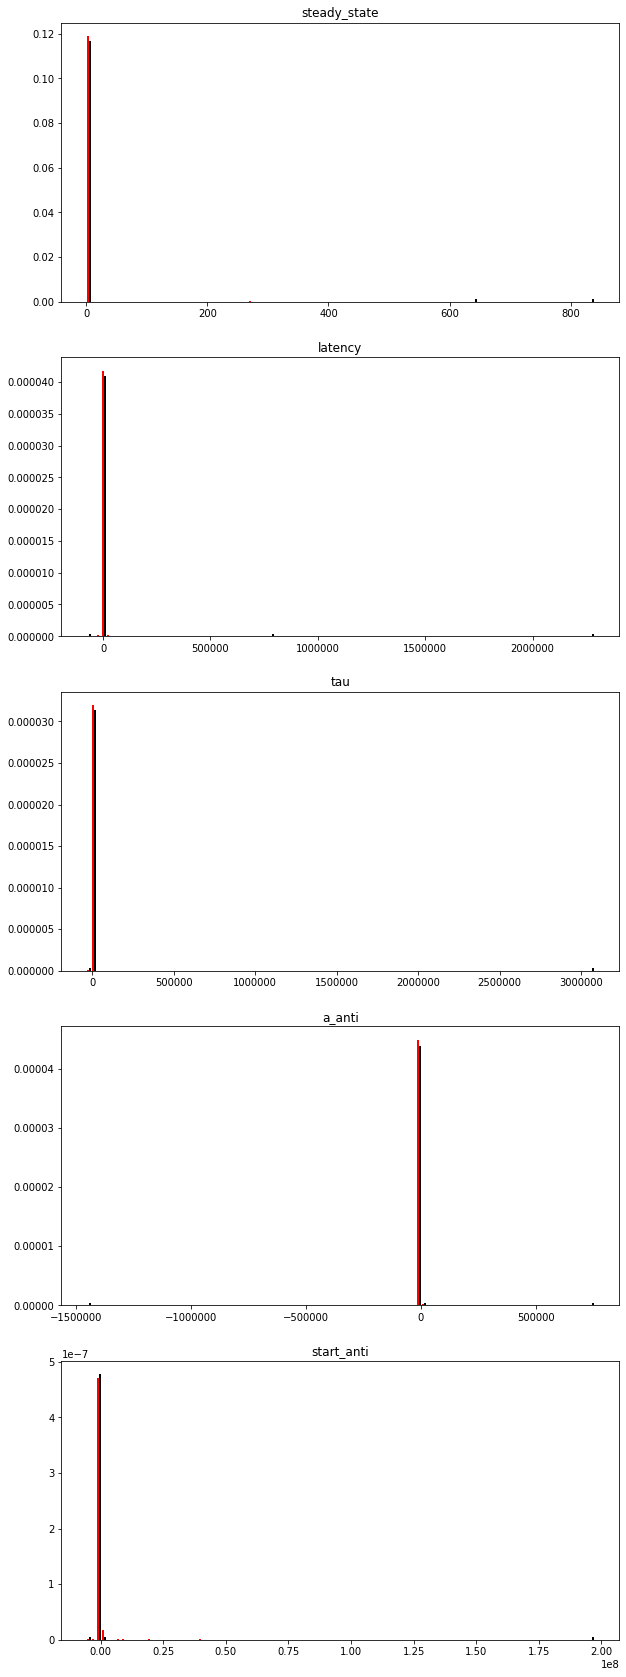

In [5]:
nb_param = len(covar_good.keys())
fig, ax = plt.subplots(nb_param, 1, figsize=(10,10*nb_param/1.681))
for num_p, p in enumerate(covar_good.keys()) :
    ax[num_p].hist((covar_good[p], covar_bad[p]),
                   density=True, color=('r', 'k'), bins=100)
    ax[num_p].set_title(p)